# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Hanipah Nurdini
- **Email:** mc299d5x0837@student.devacademy.id
- **ID Dicoding:** MC299D5X0837

## Menentukan Pertanyaan Bisnis


- Rata-rata Suhu per Kota per Tahun
- Total Polutan per Kota (2013–2017)
- Polutan paling sedikit dan paling banyak dalam suatu waktu

## Import Semua Packages/Library yang Digunakan

In [264]:
import pandas as pd        # Untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Untuk visualisasi
import seaborn as sns      # Untuk visualisasi yang lebih menarik
import zipfile
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [211]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

###A. Gathering Data

###1. Memuat tabel Aotizhongxin

In [212]:
Aotizhongxin_df = pd.read_csv("/content/drive/MyDrive/Dicoding Bootcamp/Belajar Analisis Data dengan Python/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
Aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


###2. Memuat tabel Changping

In [213]:
Changping_df = pd.read_csv("/content/drive/MyDrive/Dicoding Bootcamp/Belajar Analisis Data dengan Python/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")
Changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


###3. Memuat tabel Dingling

In [214]:
Dingling_df = pd.read_csv("/content/drive/MyDrive/Dicoding Bootcamp/Belajar Analisis Data dengan Python/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")
Dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


###4. Memuat data Dongsi

In [215]:
Dongsi_df = pd.read_csv("/content/drive/MyDrive/Dicoding Bootcamp/Belajar Analisis Data dengan Python/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")
Dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


###5. Memuat tabel Guanyuan

In [216]:
Guanyuan_df = pd.read_csv("/content/drive/MyDrive/Dicoding Bootcamp/Belajar Analisis Data dengan Python/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")
Guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


###6. Memuat tabel Gucheng

In [217]:
Gucheng_df = pd.read_csv("/content/drive/MyDrive/Dicoding Bootcamp/Belajar Analisis Data dengan Python/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv")
Gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


###7. Memuat tabel Huairou

In [218]:
Huairou_df = pd.read_csv("/content/drive/MyDrive/Dicoding Bootcamp/Belajar Analisis Data dengan Python/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv")
Huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


###8. Memuat tabel Nongzhanguan

In [219]:
Nongzhanguan_df = pd.read_csv("/content/drive/MyDrive/Dicoding Bootcamp/Belajar Analisis Data dengan Python/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
Nongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


###9. Memuat tabel Shunyi

In [220]:
Shunyi_df = pd.read_csv("/content/drive/MyDrive/Dicoding Bootcamp/Belajar Analisis Data dengan Python/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")
Shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


###10. Memuat tabel Tiantan

In [221]:
Tiantan_df = pd.read_csv("/content/drive/MyDrive/Dicoding Bootcamp/Belajar Analisis Data dengan Python/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")
Tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


###11. Memuat tabel Wanliu

In [222]:
Wanliu_df = pd.read_csv("/content/drive/MyDrive/Dicoding Bootcamp/Belajar Analisis Data dengan Python/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")
Wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


###12. Memuat tabel Wanshouxigong

In [223]:
Wanshouxigong_df = pd.read_csv("/content/drive/MyDrive/Dicoding Bootcamp/Belajar Analisis Data dengan Python/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
Wanshouxigong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**

*📆 Informasi Waktu*

•	year: Tahun pencatatan (misal: 2013)
•	month: Bulan pencatatan (misal: 3 untuk Maret)
•	day: Tanggal pencatatan (misal: 1)
•	hour: Jam pencatatan (format 24 jam, misal: 0 = jam 12 malam)
________________________________________

*🏭 Indeks Polutan (Unit biasanya dalam μg/m³ kecuali CO dalam mg/m³)*

- PM2.5 (Particulate Matter 2.5): Partikel debu halus berukuran ≤ 2.5 mikrometer. Bisa masuk ke paru-paru, berbahaya bagi kesehatan.
- PM10: Partikel debu lebih besar, ukuran ≤ 10 mikrometer. Juga bisa membahayakan pernapasan.
- SO2 (Sulfur Dioxide): Gas yang berasal dari pembakaran batu bara atau bahan bakar fosil lainnya. Bisa menyebabkan iritasi saluran pernapasan.
- NO2 (Nitrogen Dioxide): Gas dari emisi kendaraan dan pembakaran industri. Bisa mengiritasi paru-paru.
- CO (Carbon Monoxide): Gas beracun yang tidak berwarna dan tidak berbau, biasanya dari kendaraan bermotor atau pembakaran tidak sempurna.
- O3 (Ozone): Ozon permukaan rendah yang berbahaya bagi kesehatan manusia, berbeda dari ozon di stratosfer yang melindungi bumi dari sinar UV.
________________________________________
*🌡️ Kondisi Cuaca*

- TEMP: Suhu udara (°C)
- PRES (Pressure): Tekanan udara (hPa atau mb)
- DEWP (Dew Point): Titik embun, yaitu suhu di mana uap air mulai mengembun (°C)
- RAIN: Curah hujan (mm)
- wd (Wind Direction): Arah angin (misal: NNW = North-Northwest)
- WSPM (Wind Speed): Kecepatan angin (meter per detik)


### Assessing Data

In [224]:
#proses ekstraksi file ZIP berisi dataset kualitas udara, lalu menggabungkan semua file CSV dari folder tersebut menjadi satu DataFrame df_air_quality

zip_path = "/content/drive/MyDrive/Dicoding Bootcamp/Belajar Analisis Data dengan Python/PRSA_Data_20130301-20170228.zip"
extract_path = "/content/drive/MyDrive/Dicoding Bootcamp/Belajar Analisis Data dengan Python"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

data_folder = os.path.join(extract_path, "PRSA_Data_20130301-20170228")
df_air_quality = pd.concat(
    [
        pd.read_csv(os.path.join(data_folder, file)).assign(City=file.split("_")[2])
        for file in os.listdir(data_folder)
    ],
    ignore_index=True
)

df_air_quality.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,City
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Aotizhongxin


In [225]:
#Menilai Data air_quality

df_air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
 18  City     420768 non-null  object 
dtypes: float64(11), int64(5), object(3)
memory usage: 61.0+ MB


In [226]:
#memastikan apakah ada missing values

df_air_quality.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


In [227]:
#Memeriksa duplikasi data

print("Jumlah duplikasi: ", df_air_quality.duplicated().sum())

Jumlah duplikasi:  0


In [228]:
#Memeriksa parameter statistik dari kolom numerik

df_air_quality.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Insight:**

*1. Struktur Dataset*

- Dataset berisi 420.768 baris dan 19 kolom.
- Masing-masing baris mewakili satu jam pengamatan dari berbagai kota dan stasiun pemantauan.

*Tipe Data*

Terdapat:
- 5 kolom integer: seperti year, month, day, hour, dan No.
- 11 kolom float: mencakup parameter polusi dan cuaca seperti PM2.5, TEMP, CO, dll.
- 3 kolom objek: wd (arah angin), station, dan City.

*2. Kualitas Data*

- Tidak ada duplikasi dalam dataset.
- Beberapa nilai hilang (missing values) ditemukan pada variabel penting: PM2.5: 8.739 nilai hilang, CO: 20.701 nilai hilang (paling banyak), TEMP dan variabel meteorologis lainnya memiliki <500 nilai hilang, Kolom wd (arah angin) memiliki 1.822 nilai hilang, kemungkinan perlu dipertimbangkan saat analisis arah angin.

*3. Statistik Deskriptif*

📈Polutan Udara:
- PM2.5 dan PM10 memiliki nilai maksimum 999, yang terlihat seperti batas sensor atau nilai anomali.
- Median PM2.5: 55, PM10: 82 → menunjukkan distribusi yang cukup right-skewed (banyak nilai tinggi).
- CO memiliki maksimum 10.000, yang sangat tinggi dan kemungkinan outlier atau error pencatatan.

🌦️ Parameter Cuaca:

- Suhu (TEMP):
- Rata-rata: 13.5°C
- Minimum: -19.9°C
- Maksimum: 41.6°C
- Tekanan udara (PRES) dan embun (DEWP) menunjukkan nilai yang realistis untuk berbagai musim.
- Curah hujan (RAIN) mayoritas nol (median = 0), menunjukkan sebagian besar waktu tidak ada hujan.

🌬️ Kecepatan Angin (WSPM):

- Rata-rata: 1.73 m/s
- Nilai maksimum: 13.2 m/s, menunjukkan angin kencang dalam beberapa waktu


### Cleaning Data

In [229]:
#Menghilangkan duplicate data

df_air_quality.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ",df_air_quality.duplicated().sum())

Jumlah duplikasi:  0


In [230]:
#Menghitung frekuensi kemunculan masing-masing nilai di kolom PM2.5

df_air_quality["PM2.5"].value_counts()

,count
PM2.5,
3.0,8810
10.0,7088
9.0,6886
8.0,6836
11.0,6831
...,...
630.0,1
655.0,1
804.0,1


In [231]:
#Menghitung frekuensi kemunculan masing-masing nilai di kolom PM10

df_air_quality.PM10.value_counts()

,count
PM10,
6.0,4945
18.0,3748
5.0,3731
14.0,3725
16.0,3616
...,...
730.0,1
836.0,1
107.5,1


In [232]:
#Menghitung frekuensi kemunculan masing-masing nilai di kolom CO

df_air_quality.CO.value_counts()

,count
CO,
300.0,32308
400.0,31275
500.0,29171
600.0,28035
700.0,26488
...,...
1150.0,1
8099.0,1
8199.0,1


In [233]:
#Menghitung frekuensi kemunculan masing-masing nilai di kolom SO2

df_air_quality.SO2.value_counts()

,count
SO2,
2.0000,98557
3.0000,32784
4.0000,21716
5.0000,17964
6.0000,16567
...,...
278.0000,1
201.0000,1
300.0000,1


In [234]:
#Menghitung frekuensi kemunculan masing-masing nilai di kolom NO2

df_air_quality.NO2.value_counts()

,count
NO2,
16.0000,5799
22.0000,5755
20.0000,5718
17.0000,5690
18.0000,5676
...,...
150.2796,1
132.6238,1
161.3658,1


In [235]:
#Menghitung frekuensi kemunculan masing-masing nilai di kolom O3

df_air_quality.O3.value_counts()

,count
O3,
2.0000,42327
3.0000,8720
4.0000,8049
1.0000,6958
5.0000,6462
...,...
202.2048,1
194.7078,1
133.6608,1


In [236]:
#Menghitung frekuensi kemunculan masing-masing nilai di kolom TEMP

df_air_quality.TEMP.value_counts()

,count
TEMP,
3.000,3414
1.000,2903
0.000,2739
2.000,2687
-1.000,2562
...,...
-9.075,1
-9.175,1
-8.280,1


In [237]:
#Menghitung frekuensi kemunculan masing-masing nilai di kolom PRES

df_air_quality.PRES.value_counts()

,count
PRES,
1019.000000,2948
1021.000000,2932
1018.000000,2868
1020.000000,2862
1023.000000,2838
...,...
1006.667000,1
1002.571429,1
1008.333000,1


In [238]:
#Menghitung frekuensi kemunculan masing-masing nilai di kolom DEWP

df_air_quality.DEWP.value_counts()

,count
DEWP,
17.6,1559
17.0,1519
17.2,1490
16.8,1483
17.3,1455
...,...
-35.7,1
-36.0,1
-43.4,1


In [239]:
#Menghitung frekuensi kemunculan masing-masing nilai di kolom RAIN

df_air_quality.RAIN.value_counts()

,count
RAIN,
0.0,403858
0.1,3722
0.2,1841
0.3,1382
0.4,907
...,...
22.2,1
16.6,1
19.8,1


In [240]:
#Menghitung frekuensi kemunculan masing-masing nilai di kolom wd

df_air_quality.wd.value_counts()

,count
wd,
NE,43335
ENE,34142
NW,32600
N,30869
E,29752
SW,28756
NNE,28232
NNW,25326
WNW,24375


In [241]:
#Menghitung frekuensi kemunculan masing-masing nilai di kolom WSPM

df_air_quality.WSPM.value_counts()

,count
WSPM,
1.1,22249
1.0,22150
1.2,22141
0.9,20955
1.3,20383
...,...
11.8,1
11.7,1
10.4,1


In [242]:
# Mengisi nilai kosong sesuai kolom

df_air_quality.fillna({
    'PM2.5': 3.0,
    'PM10': 6.0,
    'CO': 300.0,
    'SO2': 2.0000,
    'NO2': 16.0000,
    'O3': 2.0000,
    'TEMP': 3.000,
    'PRES': 1019.000000,
    'DEWP': 17.6,
    'RAIN': 0.0,
    'wd': "NE",
    'WSPM': 1.1
}, inplace=True)

In [243]:
df_air_quality.isna().sum()


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Sel yang missing value sangat banyak sehingga apabila dilakukan penghapusan baris yang terdapat missing value maka akan menghilangkan banyak data-data yang penting
- Dari beberapa kolom yang terdapat missing value, dicari value yang paling banyak ada dalam kolom tsb, kemudian setiap sel missing value diisi dengan value paling banyak dalam kolom tsb


## Exploratory Data Analysis (EDA)

### Explore ...

In [244]:
# Pastikan kolom TEMP bertipe numerik
df_air_quality["TEMP"] = pd.to_numeric(df_air_quality["TEMP"], errors='coerce')

# Hitung rata-rata suhu per kota per tahun
city_yearly_temp = df_air_quality.groupby(["City", "year"])["TEMP"].mean().reset_index()

# Buat pivot table: baris = Kota, kolom = Tahun, isi = suhu rata-rata
pivot_table = city_yearly_temp.pivot(index="City", columns="year", values="TEMP")

# Tampilkan tabel
print("Tabel Rata-rata Suhu per Kota per Tahun:")
print(pivot_table)

Tabel Rata-rata Suhu per Kota per Tahun:
year                2013       2014       2015       2016      2017
City                                                               
Aotizhongxin   15.497740  13.878128  13.476011  13.854883  0.692114
Changping      15.961397  14.172511  13.571322  13.483220  0.445166
Dingling       15.961397  14.172511  13.571322  13.483220  0.445166
Dongsi         15.963657  13.881153  13.429949  13.854883  0.692114
Guanyuan       15.497740  13.878128  13.476011  13.854883  0.692114
Gucheng        15.910376  14.431039  14.029709  13.531052  0.404581
Huairou        14.660335  12.800400  12.422078  12.397949 -1.139338
Nongzhanguan   15.963657  13.881153  13.429949  13.854883  0.692114
Shunyi         15.535103  13.838950  13.254338  13.371849  0.014575
Tiantan        15.963657  13.881153  13.429949  13.854883  0.692114
Wanliu         15.497740  13.878402  13.353359  13.396561  0.437947
Wanshouxigong  15.854153  14.292637  13.563500  13.854883  0.692114


In [245]:
# Pastikan semua kolom polutan dikonversi ke numerik (jika belum)
polutan_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
df_air_quality[polutan_cols] = df_air_quality[polutan_cols].apply(pd.to_numeric, errors='coerce')

# Hitung total polusi per kota untuk tiap jenis polutan
total_polutan_per_city = df_air_quality.groupby("City")[polutan_cols].sum().reset_index()

# Urutkan berdasarkan salah satu polutan, misalnya PM2.5 (opsional)
total_polutan_per_city = total_polutan_per_city.sort_values(by="PM2.5", ascending=False)

# Tampilkan tabel
print("Total Polutan per Kota (2013–2017):")
print(total_polutan_per_city.to_string(index=False))

Total Polutan per Kota (2013–2017):
         City     PM2.5      PM10         SO2          NO2         CO           O3
       Dongsi 2959921.1 3811149.3 638814.5984 1822560.4545 43344413.0 1969373.9094
Wanshouxigong 2924197.5 3883591.2 591164.2040 1917283.2083 46663229.0 1913185.5016
 Nongzhanguan 2923382.0 3776347.7 647876.1800 2007988.0093 45201649.0 2023853.5506
       Wanliu 2892747.9 3843663.4 634936.4384 2235527.2823 44414743.0 1614941.6930
      Gucheng 2887959.2 4124776.0 532022.4472 1932429.4941 44989251.0 1982411.6648
     Guanyuan 2858736.8 3778596.1 609418.6664 2002650.0108 42873987.0 1893295.8458
 Aotizhongxin 2828583.3 3784442.2 594892.1392 2035197.8675 42573718.0 1882540.7362
      Tiantan 2827435.8 3669618.7 489959.0624 1836445.9961 44399618.0 1917524.6136
       Shunyi 2717456.7 3411295.2 460892.6024 1501524.8328 39691186.0 1856362.3446
    Changping 2440332.2 3267484.7 516380.8728 1530403.1952 39107944.0 1997820.4902
      Huairou 2377884.0 3141329.0 415111.0128 11124

In [246]:
# Melihat polutan paling sedikit dan paling banyak dalam suatu waktu
# Pastikan data tanggal dan waktu dalam satu kolom datetime
df_air_quality["datetime"] = pd.to_datetime(df_air_quality[["year", "month", "day", "hour"]])

# Polutan yang ingin dianalisis
pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

# List untuk menyimpan hasil
results = []

# Loop untuk tiap polutan
for pol in pollutants:
    # Pastikan kolom numerik
    df_air_quality[pol] = pd.to_numeric(df_air_quality[pol], errors="coerce")

    max_row = df_air_quality.loc[df_air_quality[pol].idxmax()]
    min_row = df_air_quality.loc[df_air_quality[pol].idxmin()]

    results.append({
        "Polutan": pol,
        "Nilai Maks": max_row[pol],
        "Waktu Maks": max_row["datetime"],
        "Nilai Min": min_row[pol],
        "Waktu Min": min_row["datetime"]
    })

# Buat DataFrame dari hasil
df_extremes = pd.DataFrame(results)

# Tampilkan sebagai tabel
from tabulate import tabulate
print(tabulate(df_extremes, headers='keys', tablefmt='grid'))

+----+-----------+--------------+---------------------+-------------+---------------------+
|    | Polutan   |   Nilai Maks | Waktu Maks          |   Nilai Min | Waktu Min           |
+====+===========+==============+=====================+=============+=====================+
|  0 | PM2.5     |          999 | 2016-02-08 02:00:00 |      2      | 2013-04-18 14:00:00 |
+----+-----------+--------------+---------------------+-------------+---------------------+
|  1 | PM10      |          999 | 2014-01-23 15:00:00 |      2      | 2013-08-03 03:00:00 |
+----+-----------+--------------+---------------------+-------------+---------------------+
|  2 | SO2       |          500 | 2014-05-14 16:00:00 |      0.2856 | 2013-06-24 23:00:00 |
+----+-----------+--------------+---------------------+-------------+---------------------+
|  3 | NO2       |          290 | 2015-10-16 20:00:00 |      1.0265 | 2013-11-10 01:00:00 |
+----+-----------+--------------+---------------------+-------------+-----------

**Insight:**
Selama periode 2013–2017, tercatat penurunan suhu rata-rata yang cukup drastis di hampir semua kota pada tahun 2017. Kota seperti Huairou bahkan mengalami suhu rata-rata negatif (-1.1°C), sementara kota lainnya seperti Shunyi, Gucheng, dan Wanliu juga menunjukkan penurunan ekstrem hingga sekitar 0.4°C–0.6°C. Hal ini diduga kuat akibat data tahun 2017 yang tidak lengkap atau adanya anomali dalam pencatatan data, karena penurunan suhu sebesar itu sangat tidak lazim secara klimatologis.

Dalam hal pencemaran udara, Dongsi menjadi kota dengan total polusi PM2.5 tertinggi, yaitu sekitar 2.96 juta mikrogram. Sementara Gucheng mencatatkan angka tertinggi untuk PM10, dan Nongzhanguan untuk SO2. Untuk polusi gas lainnya, Wanliu mendominasi total NO2, Wanshouxigong mencatat CO tertinggi dengan lebih dari 46 juta µg/m³, dan Dingling menjadi kota dengan total O3 paling tinggi. Kota-kota seperti Dongsi, Wanshouxigong, Nongzhanguan, dan Wanliu secara konsisten muncul sebagai wilayah dengan beban polusi tertinggi, menunjukkan tingkat pencemaran udara yang signifikan dan berpotensi membahayakan kesehatan.

Selain itu, data menunjukkan bahwa puncak-puncak tertinggi untuk berbagai jenis polutan sering terjadi pada malam hingga dini hari, sekitar pukul 02:00 hingga 06:00, serta pada sore hari. Sebagai contoh, PM2.5 mencapai angka maksimum (999) pada pukul 02:00 tanggal 8 Februari 2016, sedangkan CO mencapai 10.000 pada pukul 06:00 tanggal 1 Desember 2015. Hal ini menunjukkan bahwa kondisi udara pada malam dan dini hari cenderung memburuk, kemungkinan karena minimnya sirkulasi udara, suhu rendah yang memerangkap polutan dekat permukaan, serta sisa emisi dari aktivitas manusia dan industri sebelumnya.

Secara keseluruhan, insight ini mengindikasikan bahwa beberapa kota di dataset mengalami beban polusi tinggi yang perlu mendapatkan perhatian lebih dalam pengelolaan kualitas udara. Selain itu, terdapat kebutuhan untuk memvalidasi dan melengkapi data suhu, khususnya pada tahun 2017, agar analisis yang dihasilkan dapat lebih akurat dan dapat diandalkan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Rata-rata Suhu per Kota per Tahun

In [247]:
# Pastikan kolom tahun dan TEMP sudah benar
df_air_quality["year"] = df_air_quality["year"].astype(int)
df_air_quality["TEMP"] = pd.to_numeric(df_air_quality["TEMP"], errors="coerce")

# Hitung rata-rata suhu per kota per tahun
avg_temp_by_city_year = df_air_quality.groupby(["City", "year"])["TEMP"].mean().reset_index()

# Urutkan kota biar warnanya konsisten
sorted_cities = sorted(avg_temp_by_city_year["City"].unique())


In [248]:
pivot_temp = pivot_temp.apply(pd.to_numeric, errors='coerce')


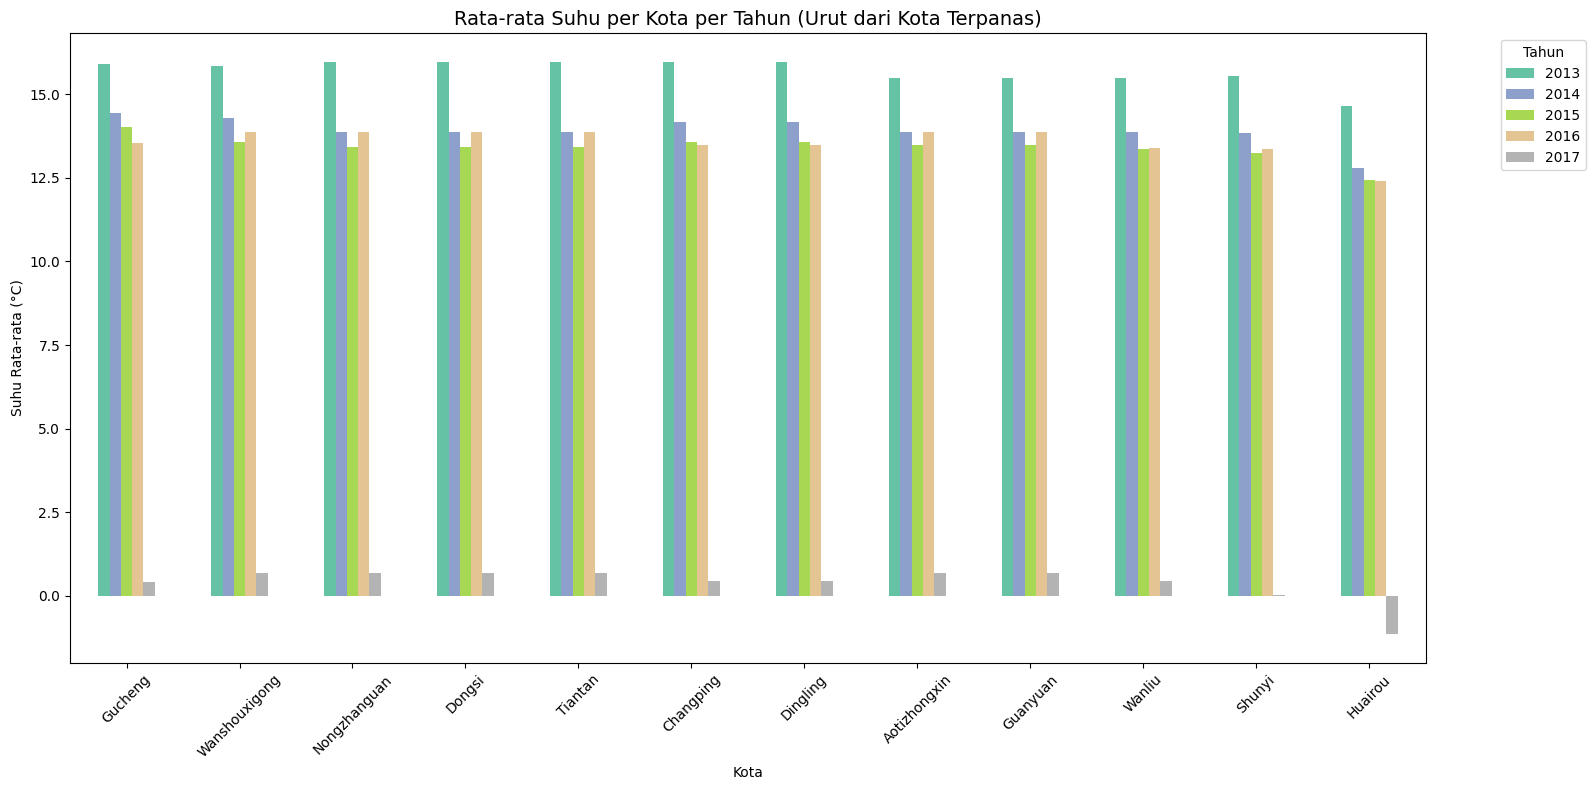

In [249]:
# Pivot data: Kota = index, Tahun = kolom, Nilai = suhu
pivot_temp = avg_temp_by_city_year.pivot(index='City', columns='year', values='TEMP')

# Pastikan datanya numerik
pivot_temp = pivot_temp.apply(pd.to_numeric, errors='coerce')

# Tambahkan kolom bantu: rata-rata suhu semua tahun
pivot_temp['avg_temp'] = pivot_temp.mean(axis=1)

# Urutkan berdasarkan suhu rata-rata (dari tertinggi ke terendah)
pivot_temp = pivot_temp.sort_values(by='avg_temp', ascending=False)

# Hapus kolom bantu
pivot_temp = pivot_temp.drop(columns='avg_temp')

# Visualisasi
pivot_temp.plot(kind='bar', figsize=(16, 8), colormap='Set2')

plt.title("Rata-rata Suhu per Kota per Tahun (Urut dari Kota Terpanas)", fontsize=14)
plt.xlabel("Kota")
plt.ylabel("Suhu Rata-rata (°C)")
plt.legend(title="Tahun", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Pertanyaan 2: Total Polutan per Kota (2013–2017)

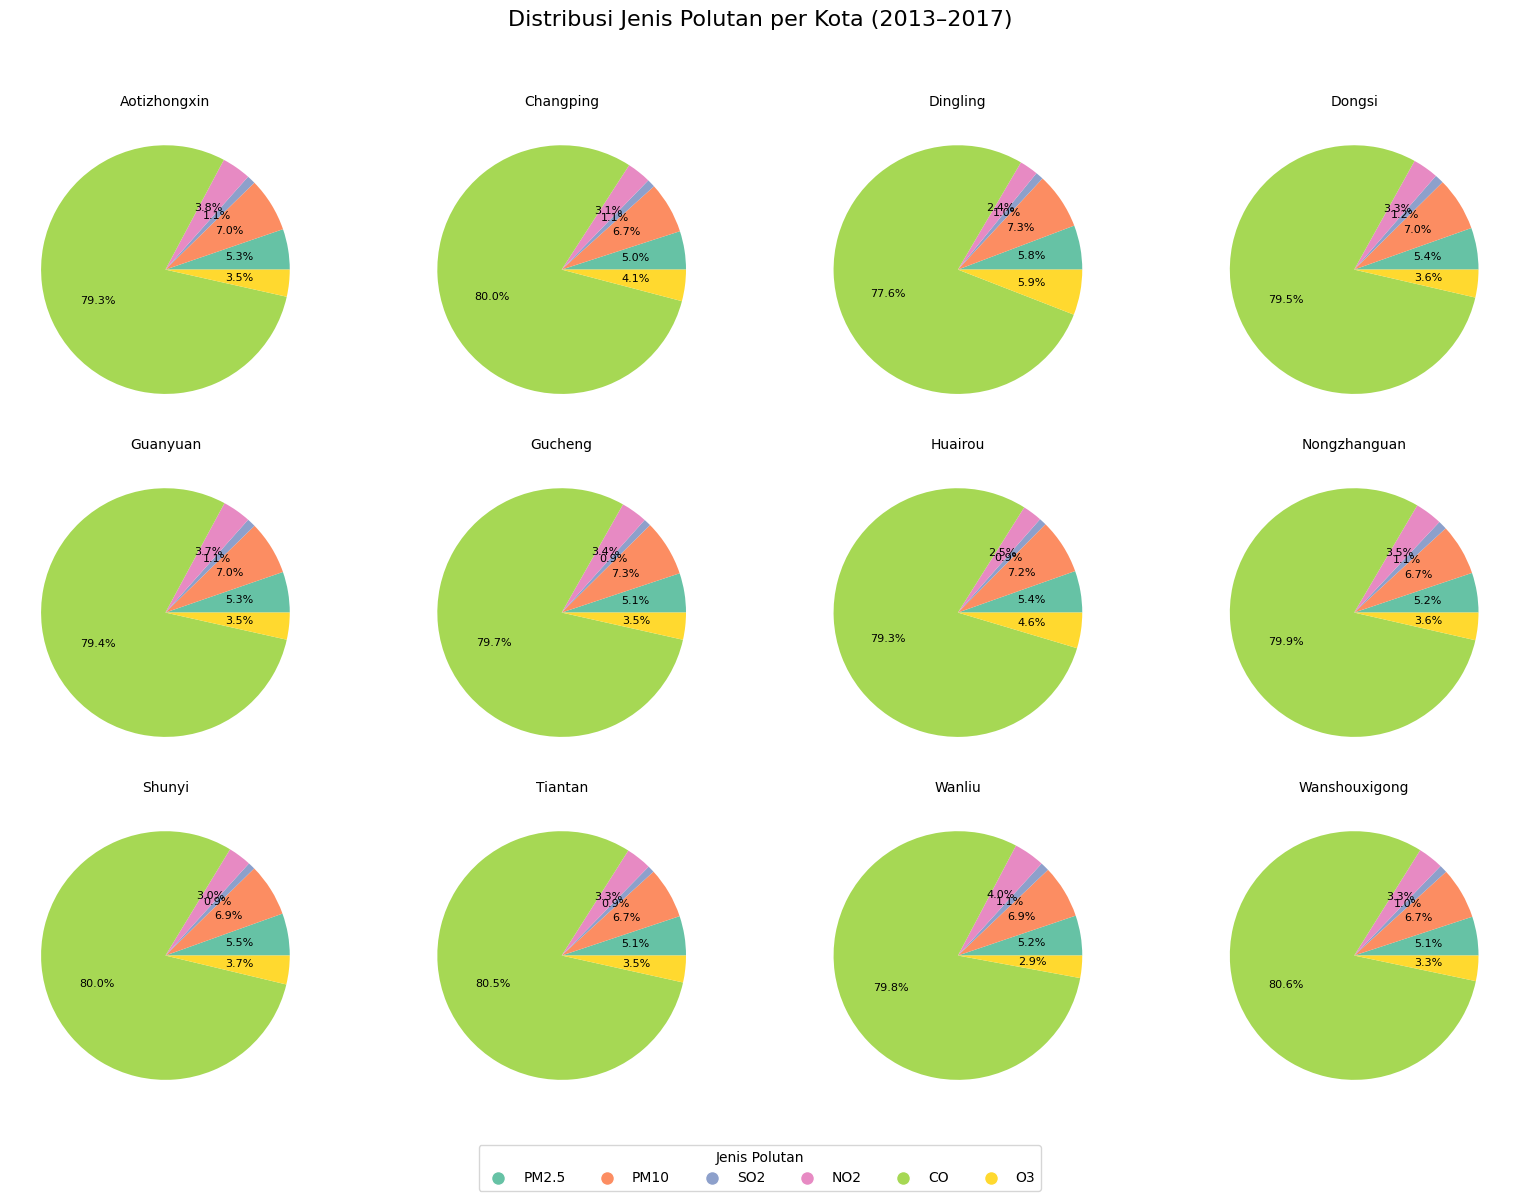

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Daftar polutan
pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

# Ambil hanya kolom kota + polutan
df_pollutants = df_air_quality[["City"] + pollutants].copy()

# Group by kota dan jumlahkan polutan
total_pollutants_per_city = df_pollutants.groupby("City")[pollutants].sum().reset_index()

# Filter hanya kota dengan setidaknya satu polutan bernilai > 0
total_pollutants_per_city = total_pollutants_per_city[
    total_pollutants_per_city[pollutants].sum(axis=1) > 0
]

# Tentukan jumlah subplot (grid)
num_cities = total_pollutants_per_city.shape[0]
cols = 4
rows = math.ceil(num_cities / cols)

# Warna tetap untuk semua jenis polutan
colors = sns.color_palette("Set2", len(pollutants))
color_dict = dict(zip(pollutants, colors))

# Plot pie chart
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
axes = axes.flatten()

for i, (_, row) in enumerate(total_pollutants_per_city.iterrows()):
    city_name = row["City"]
    values = row[pollutants]

    valid_values = values[values > 0].dropna()
    labels = valid_values.index
    data = valid_values.values
    pie_colors = [color_dict[p] for p in labels]

    axes[i].pie(
        data,
        labels=None,  # Tanpa label di pie
        autopct="%1.1f%%",
        colors=pie_colors,
        textprops={'fontsize': 8}
    )
    axes[i].set_title(city_name, fontsize=10)

# Matikan sisa axes jika tidak terpakai
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

# Tambahkan legend global
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=p, markerfacecolor=color_dict[p], markersize=10)
                 for p in pollutants]

fig.legend(
    handles=legend_labels,
    title="Jenis Polutan",
    loc="lower center",
    ncol=len(pollutants),
    bbox_to_anchor=(0.5, -0.01)
)

plt.suptitle("Distribusi Jenis Polutan per Kota (2013–2017)", fontsize=16)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()


### Pertanyaan 3: Rata-rata polutan tiap jam per kota

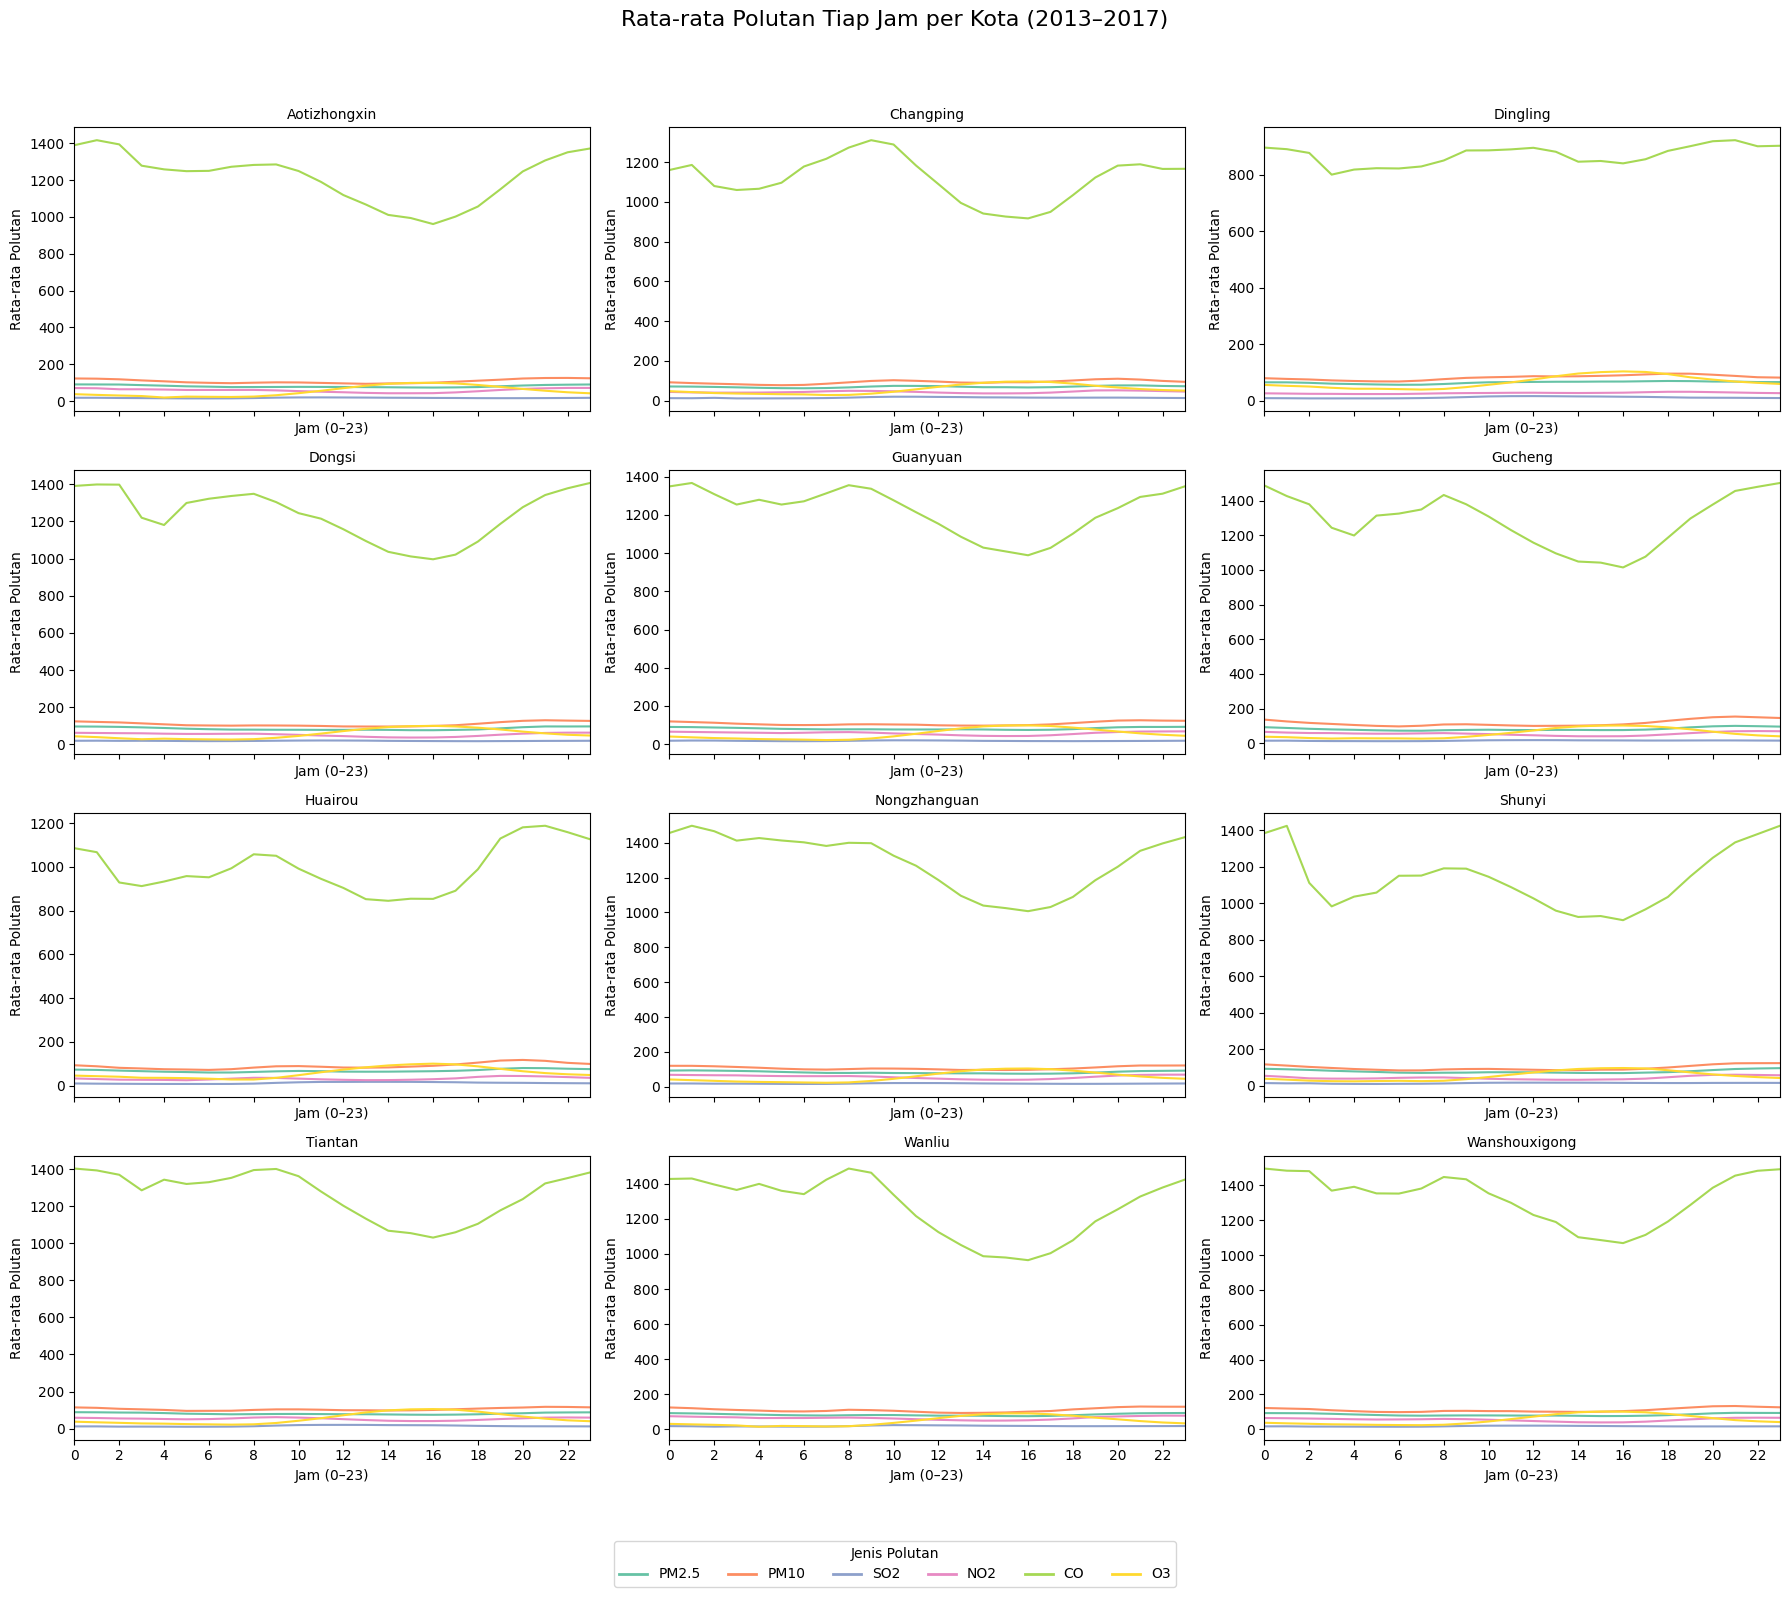

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# Gabungkan kolom waktu
df_air_quality["datetime"] = pd.to_datetime(df_air_quality[["year", "month", "day", "hour"]], errors="coerce")
df_air_quality = df_air_quality.dropna(subset=["datetime"])

# Tambahkan kolom jam dari datetime
df_air_quality["hour_of_day"] = df_air_quality["datetime"].dt.hour

# List polutan yang diamati
pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

# Bersihkan data dari baris yang semua polutan kosong
df_hourly = df_air_quality[["station", "hour_of_day"] + pollutants].dropna(how="all", subset=pollutants)

# Hitung rata-rata tiap jam per kota
avg_by_hour = df_hourly.groupby(["station", "hour_of_day"])[pollutants].mean().reset_index()

# Plot
cities = avg_by_hour["station"].unique()
num_cities = len(cities)
cols = 3
rows = math.ceil(num_cities / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4), sharex=True)
axes = axes.flatten()

# Warna konsisten
colors = sns.color_palette("Set2", len(pollutants))
color_dict = dict(zip(pollutants, colors))

for i, city in enumerate(cities):
    ax = axes[i]
    city_data = avg_by_hour[avg_by_hour["station"] == city]

    for pol in pollutants:
        ax.plot(city_data["hour_of_day"], city_data[pol], label=pol, color=color_dict[pol])

    ax.set_title(city, fontsize=10)
    ax.set_xlabel("Jam (0–23)")
    ax.set_ylabel("Rata-rata Polutan")
    ax.set_xticks(range(0, 24, 2))
    ax.set_xlim(0, 23)

# Kosongkan plot berlebih
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

# Legenda global
legend_handles = [
    plt.Line2D([0], [0], color=color_dict[p], lw=2, label=p) for p in pollutants
]
fig.legend(handles=legend_handles, title="Jenis Polutan", loc="lower center", ncol=6, bbox_to_anchor=(0.5, -0.01))

plt.suptitle("Rata-rata Polutan Tiap Jam per Kota (2013–2017)", fontsize=16)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

**Insight:**

1. Rata-rata suhu per kota per tahun

Grafik menunjukkan rata-rata suhu per kota dari tahun 2013 hingga 2017, diurutkan dari kota terpanas ke yang terdingin. Terlihat bahwa suhu rata-rata di hampir semua kota mengalami penurunan dari tahun ke tahun. Tahun 2013 merupakan tahun dengan suhu rata-rata tertinggi, sedangkan 2017 menjadi tahun terendah secara umum. Penurunan suhu ini tampak cukup konsisten di semua kota yang ditampilkan.

Kota-kota seperti Gucheng, Wanshouxigong, Nongzhanguan, dan Dongsi secara konsisten berada di posisi teratas sebagai kota dengan suhu tertinggi setiap tahunnya. Sebaliknya, kota seperti Huairou dan Shunyi berada di posisi terbawah, menunjukkan suhu rata-rata yang cenderung lebih rendah dibandingkan kota lain. Secara umum, pola ini menunjukkan adanya perbedaan karakteristik iklim antarkota serta potensi pengaruh faktor geografis terhadap suhu udara rata-rata setiap tahunnya.



2. Distribusi jenis polutan perkota

Grafik pie di atas menunjukkan distribusi jenis polutan di berbagai kota dari tahun 2013 hingga 2017. Terlihat bahwa PM2.5 (partikulat halus) mendominasi komposisi polusi udara di semua kota dengan persentase sekitar 77–81%. Hal ini menunjukkan bahwa partikel halus merupakan masalah utama kualitas udara di wilayah-wilayah ini. Polutan lain seperti PM10, NO2, SO2, CO, dan O3 hanya menyumbang sebagian kecil dari total polusi.

Secara umum, komposisi jenis polutan tampak cukup seragam di semua kota, dengan sedikit variasi. Kota seperti Tiantan dan Wanshouxigong memiliki proporsi PM2.5 tertinggi (di atas 80%), sementara Dingling memiliki proporsi PM2.5 yang sedikit lebih rendah (77,6%) namun dengan kontribusi NO2 dan CO yang sedikit lebih tinggi. Konsistensi distribusi ini memperkuat indikasi bahwa sumber utama polusi di wilayah ini kemungkinan berasal dari sumber yang sama, seperti emisi kendaraan bermotor atau pembakaran batu bara yang menghasilkan partikulat halus dalam jumlah besar.



3. Rata-rata polutan tiap jam perkota

Grafik di atas menunjukkan rata-rata konsentrasi tiap jenis polutan berdasarkan jam (0–23) di berbagai kota selama periode 2013 hingga 2017. Terlihat bahwa polutan PM2.5 (garis hijau muda) memiliki konsentrasi yang jauh lebih tinggi dibanding polutan lainnya di semua kota, mengindikasikan bahwa partikel halus tetap menjadi sumber utama pencemaran udara. Pola harian PM2.5 cenderung membentuk kurva yang menurun dari pagi ke siang hari, kemudian meningkat lagi pada sore hingga malam hari, menunjukkan kemungkinan hubungan dengan aktivitas manusia seperti lalu lintas dan pemanasan rumah tangga.

Sementara itu, polutan lain seperti PM10, SO2, NO2, CO, dan O3 menunjukkan variasi yang lebih kecil sepanjang hari, dan konsentrasinya relatif rendah. NO2 dan CO, yang seringkali terkait dengan emisi kendaraan, tampak sedikit meningkat pada jam-jam sibuk (sekitar pukul 7–9 pagi dan 17–19 sore), mendukung dugaan adanya kontribusi dari transportasi. Konsistensi pola ini di hampir semua kota menunjukkan kesamaan dalam ritme aktivitas harian dan sumber emisi, serta perlunya kebijakan pengendalian polusi yang mempertimbangkan jam puncak aktivitas masyarakat.


## Analisis Lanjutan (Opsional)

In [263]:
#Menghitung Rata-rata Tiap Polutan per Kota

# Pastikan ini adalah nama kolom polutan di dataset kamu
pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

# Hitung rata-rata tiap polutan per kota
avg_pollutants_per_city = df_air_quality.groupby("City")[pollutants].mean().reset_index()

# Lihat hasilnya
print(avg_pollutants_per_city.head())

           City      PM2.5        PM10        SO2        NO2           CO  \
0  Aotizhongxin  80.669156  107.929563  16.965895  58.042376  1214.171743   
1     Changping  69.596515   93.186308  14.726810  43.645996  1115.330367   
2      Dingling  64.590090   82.285318  11.546671  27.177742   870.186659   
3        Dongsi  84.414816  108.691230  18.218532  51.978110  1236.151409   
4      Guanyuan  81.529112  107.762837  17.380181  57.114134  1222.735198   

          O3  
0  53.688705  
1  56.976400  
2  66.244306  
3  56.165124  
4  53.995433  


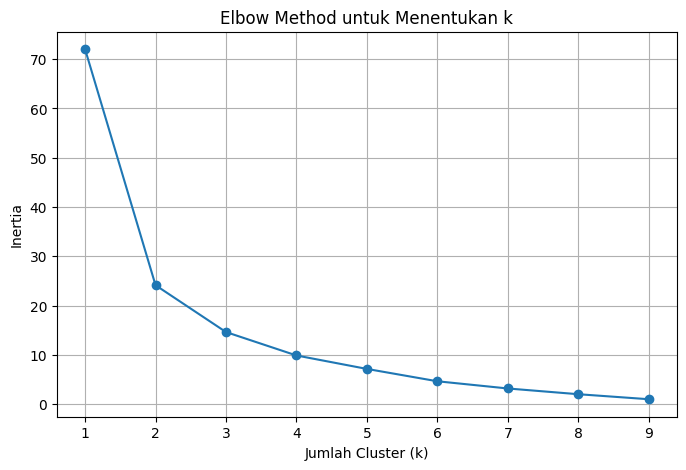

In [265]:
# Gunakan dataframe dari langkah sebelumnya
# avg_pollutants_per_city: rata-rata polutan per kota

# 1. Standarisasi data (penting sebelum clustering)
scaler = StandardScaler()
pollutant_values_scaled = scaler.fit_transform(avg_pollutants_per_city[pollutants])

# 2. Menentukan jumlah cluster optimal dengan metode Elbow
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pollutant_values_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk Menentukan k")
plt.xticks(K)
plt.grid(True)
plt.show()

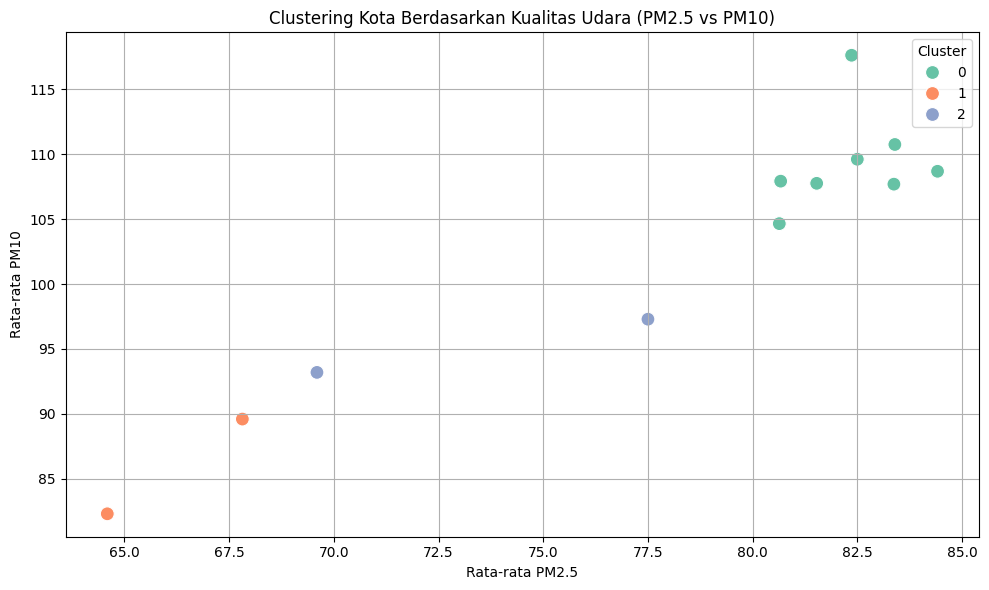

In [266]:
# 3. Jalankan KMeans dengan jumlah cluster optimal (misal k = 3)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
avg_pollutants_per_city["Cluster"] = kmeans.fit_predict(pollutant_values_scaled)

# 4. Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=avg_pollutants_per_city,
    x="PM2.5", y="PM10",
    hue="Cluster",
    palette="Set2",
    s=100
)
plt.title("Clustering Kota Berdasarkan Kualitas Udara (PM2.5 vs PM10)")
plt.xlabel("Rata-rata PM2.5")
plt.ylabel("Rata-rata PM10")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


**Insight**

Berdasarkan hasil visualisasi Elbow Method dan hasil clustering kota berdasarkan kualitas udara (PM2.5 dan PM10), berikut beberapa insight yang dapat diambil:

1. Penentuan Jumlah Cluster (k)
Melalui Elbow Method, terlihat bahwa titik “tekukan” atau elbow terjadi pada k = 3. Ini berarti pembagian kota ke dalam 3 klaster adalah jumlah yang optimal karena setelah titik ini, penurunan nilai inertia tidak signifikan. Dengan demikian, digunakan 3 klaster untuk menganalisis kualitas udara berdasarkan PM2.5 dan PM10.

2. Hasil Clustering Kualitas Udara

Visualisasi scatter plot menunjukkan pembagian kota menjadi 3 klaster berdasarkan rata-rata PM2.5 dan PM10:

- Cluster 0 (Hijau): Berisi kota-kota dengan tingkat polusi paling tinggi, ditunjukkan dengan nilai PM2.5 dan PM10 yang tinggi. Kota-kota dalam klaster ini kemungkinan merupakan pusat aktivitas industri atau perkotaan padat.

- Cluster 1 (Oranye): Mewakili kota-kota dengan tingkat polusi paling rendah. PM2.5 dan PM10 berada pada level yang jauh lebih rendah dibanding dua klaster lainnya. Kota dalam klaster ini mungkin memiliki ruang hijau lebih banyak atau aktivitas transportasi lebih rendah.

- Cluster 2 (Biru): Kota-kota dalam klaster ini berada di tingkat polusi menengah, tidak separah klaster 0 namun juga tidak sebersih klaster 1. Mereka mungkin merupakan daerah suburban atau kota dengan kontrol polusi sedang.

3. Implikasi

Hasil clustering ini dapat digunakan oleh pembuat kebijakan untuk menargetkan intervensi pengendalian polusi secara lebih efektif:

- Klaster 0: Fokus pada pengurangan emisi industri dan transportasi.

- Klaster 1: Dapat dijadikan contoh praktik terbaik dalam pengelolaan kualitas udara.

- Klaster 2: Potensi perbaikan melalui kebijakan berskala sedang.

Juga dapat digunakan untuk pemantauan dan evaluasi program lingkungan hidup, serta untuk mendukung edukasi publik mengenai kualitas udara di kota masing-masing.

## Conclusion

In [267]:
#df_air_quality.to_csv("/content/drive/MyDrive/Dicoding Bootcamp/Belajar Analisis Data dengan Python/main_data.csv", index=False)

Kesimpulan Proyek Analisis Kualitas Udara di Beijing (2013–2017)
Dalam proyek ini, dilakukan analisis terhadap data kualitas udara di beberapa kota di Beijing dari tahun 2013 hingga 2017. Tiga pertanyaan utama dijawab melalui visualisasi data, yakni:

1. Bagaimana tren rata-rata suhu tiap kota per tahun?

2. Bagaimana distribusi jenis polutan di tiap kota?

3. Bagaimana pola rata-rata konsentrasi polutan setiap jam di berbagai kota?


-------------------------------------------------------------

Jawaban:

1. Tren Rata-rata Suhu Tiap Kota per Tahun

Dari grafik suhu rata-rata per kota per tahun, terlihat bahwa tahun 2013 merupakan tahun terpanas di semua kota, diikuti oleh tren penurunan suhu di tahun-tahun berikutnya. Secara konsisten, kota Gucheng dan Wanshouxigong mencatat suhu tertinggi dibanding kota lainnya, sedangkan Huairou tercatat sebagai kota terdingin, bahkan menunjukkan anomali suhu negatif di 2017. Ini menunjukkan adanya variasi suhu antarkota dan potensi penurunan suhu rata-rata selama periode tersebut.

2. Distribusi Jenis Polutan di Tiap Kota

Visualisasi pie chart mengungkapkan bahwa PM2.5 mendominasi jenis polutan di seluruh kota, dengan kontribusi sekitar 77–81% dari total polusi. Polutan lain seperti PM10, NO2, dan SO2 menyumbang sebagian kecil, masing-masing di bawah 10%. Konsistensi distribusi ini menunjukkan bahwa sumber pencemar utama di Beijing selama periode ini berasal dari partikel halus yang berbahaya bagi kesehatan pernapasan.

3. Pola Rata-rata Konsentrasi Polutan Setiap Jam

Dari grafik jam-jaman rata-rata polutan, terlihat bahwa konsentrasi PM2.5 cenderung lebih tinggi pada malam hingga pagi hari (sekitar pukul 0–8) dan kembali naik pada sore hingga malam hari. Ini menunjukkan pola harian yang erat kaitannya dengan aktivitas manusia seperti lalu lintas dan pemanas rumah. Polutan lain seperti NO2 dan CO juga menunjukkan peningkatan ringan pada jam-jam sibuk, mendukung hipotesis bahwa emisi kendaraan berperan besar.